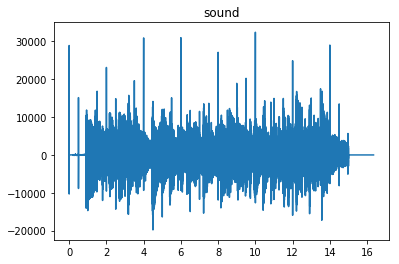

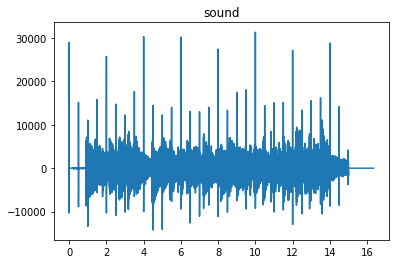

In [109]:
# import sound-wave file

import wave
import numpy as np
import matplotlib.pyplot as plt


f1= open("sound1.txt","w")
f2= open("sound2.txt","w")
f3= open("time.txt","w")
def read_wav_data(filename):
    wav = wave.open(filename,"rb") # 打开一个wav格式的声音文件流
    num_frame = wav.getnframes() # 获取帧数
    num_channel=wav.getnchannels() # 获取声道数
    framerate=wav.getframerate() # 获取帧速率
    num_sample_width=wav.getsampwidth() # 获取实例的比特宽度，即每一帧的字节数
    str_data = wav.readframes(num_frame) # 读取全部的帧
    wav.close() # 关闭流
    wave_data = np.fromstring(str_data, dtype = np.short) # 将声音文件数据转换为数组矩阵形式
    wave_data.shape = -1, num_channel # 按照声道数将数组整形，单声道时候是一列数组，双声道时候是两列的矩阵
    wave_data = wave_data.T # 将矩阵转置
    wave_data = wave_data 
    return wave_data, framerate


def wav_show(wave_data, fs): # 显示出来声音波形
    time = np.arange(0, len(wave_data)) * (1.0/fs)  # 计算声音的播放时间，单位为秒
    # 画声音波形
    plt.plot(time, wave_data)  
    plt.title("sound")
    plt.show()

  
if(__name__=='__main__'):
	wave_data, fs = read_wav_data("Recording-3.wav")  
	wav_show(wave_data[0],fs)
	wav_show(wave_data[1],fs)  # 如果是双声道则保留这一行，否则删掉这一行
	time = np.arange(0, len(wave_data[0])) * (1.0/fs)
	for i in range(len(wave_data[0])):
		f1.write(str(wave_data[0][i])+"\n")
		f2.write(str(wave_data[1][i])+"\n")	
		f3.write(str(time[i])+"\n")

f1.close()
f2.close()
f3.close()

Integration successful.


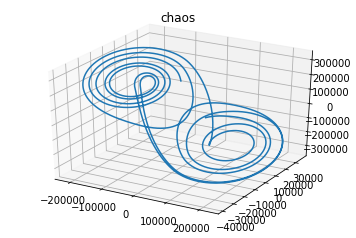

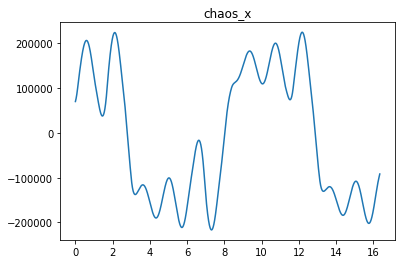

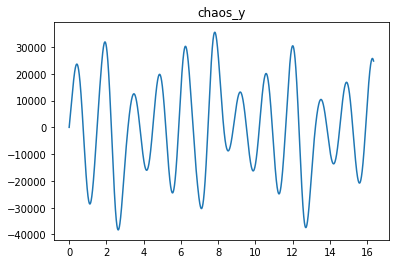

In [110]:
#chaos produce

import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#define universal variables

c0 = 15.6
c1 = 1.0
c2 = 28.0
m0 = -1.143
m1 = -0.714


#open the data from our sound 
f1= open("sound1.txt","r")
f2= open("sound2.txt","r")
f3= open("time.txt","r")

#just a little extra, quite unimportant
def f(x):
    f = m1*x+(m0-m1)/2.0*(abs(x+1.0)-abs(x-1.0))
    return f

#the actual function calculating
def dH_dt(H, t=0):
    return np.array([c0*(H[1]-H[0]-f(H[0])),
                  c1*(H[0]-H[1]+H[2]),
                  -c2*H[1]])




#computational time steps
t=[]
sound1=[]
sound2=[]
for i in range (720832):
	t.append(float(f3.readline()))
	sound1.append(float(f1.readline()))
	sound2.append(float(f2.readline()))
    

#for i in range(720832):
    #sound1[i] = sound1[i]/5000
    #sound2[i] = sound2[i]/5000

#x, y, and z initial conditions
H0 = [0.7, 0.0, 0.0]

H, infodict = integrate.odeint(dH_dt, H0, t, full_output=True)

print(infodict['message'])

#plt.subplot(221)
fig1=plt.figure(1)
ax = fig1.add_subplot(111, projection='3d')
ax.plot(H[:,0]*10**5, H[:,1]*10**5, H[:,2]*10**5)
plt.title("chaos")
plt.show()

plt.plot(t, H[:,0]*10**5)
plt.title("chaos_x")
plt.show()
plt.plot(t, H[:,1]*10**5)
plt.title("chaos_y")
plt.show()

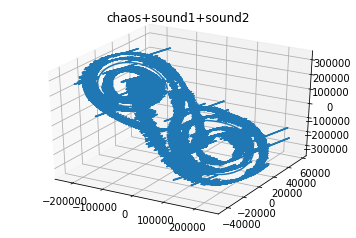

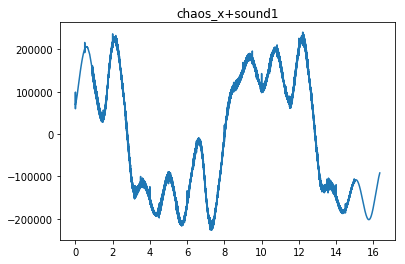

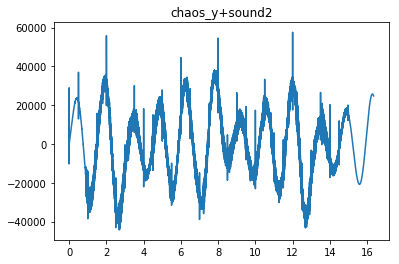

In [111]:
# signal add into chaos

#plt.subplot(223)
fig3 = plt.figure(3)
ax = fig3.add_subplot(111, projection='3d')
ax.plot(H[:,0]*10**5+sound1, H[:,1]*10**5+sound2, H[:,2]*10**5)
plt.title("chaos+sound1+sound2")
plt.show()

out1=H[:,0]*10**5+sound1
out2=H[:,1]*10**5+sound2
#print (out)

fig4=plt.figure(4)
plt.plot(t,out1)
plt.title("chaos_x+sound1")
plt.show()
fig5=plt.figure(5)
plt.plot(t,out2)
plt.title("chaos_y+sound2")
plt.show()

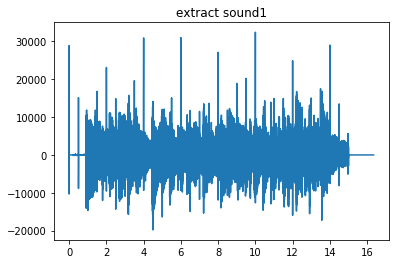

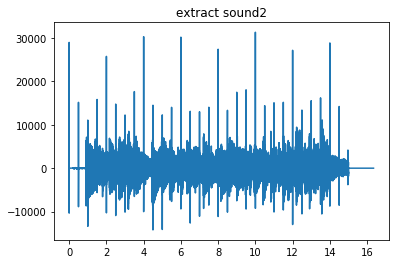

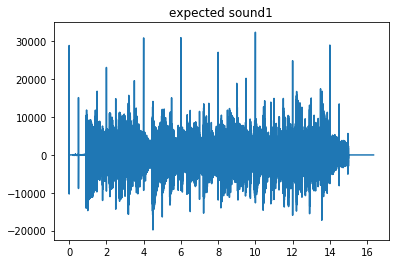

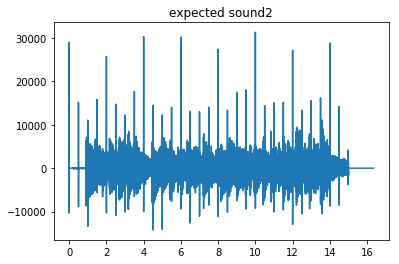

In [112]:
# signal extract from chaos
plt.plot(t,out1-H[:,0]*10**5)
plt.title("extract sound1")
plt.show()
fig5=plt.figure(5)
plt.plot(t,out2-H[:,1]*10**5)
plt.title("extract sound2")
plt.show()

# signal import from original file
plt.plot(t,sound1)
plt.title("expected sound1")
plt.show()
plt.plot(t,sound2)
plt.title("expected sound2")
plt.show()

f4= open("in1.txt","w")
f5= open("in2.txt","w")
for i in range(720832):
    f4.write(str(out1[i])+"\n")
    f5.write(str(out2[i])+"\n")

f4.close()
f5.close()
f1.close()
f2.close()
f3.close()

[ 0.  0.  0. ...,  0.  0.  0.]


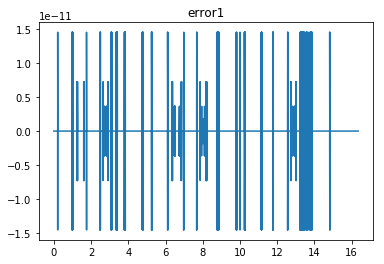

[ 0.  0.  0. ...,  0.  0.  0.]


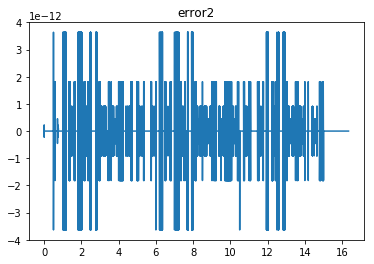

In [113]:
#python numerical error (32 bits at most)
error1 = (out1-H[:,0]*10**5) - sound1
print(error)
plt.plot(t, error1)
plt.title("error1")
plt.show()

error2 = (out2-H[:,1]*10**5) - sound2
print(error)
plt.plot(t, error2)
plt.title("error2")
plt.show()

In [ ]:
import wave
import numpy as np
import scipy.signal as signal

wave_data = 

# 打开WAV文档
f = wave.open(r"sweep.wav", "wb")

# 配置声道数、量化位数和取样频率
f.setnchannels(1)
f.setsampwidth(2)
f.setframerate(framerate)
# 将wav_data转换为二进制数据写入文件
f.writeframes(wave_data.tostring())
f.close()